In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


In [3]:
data1 = pd.read_csv('Raw_data1.csv')
data1

,Unnamed: 0,Course,College,Year Level,School Year,No.,Appno,SCHOOL,Cntr,Date,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Word,SY
0,0,BAT,College of Agriculture,1,2018-2019,957.0,1819-06087,MARCELO SPINOLA SCHOOL,ZAM,3/11/2018,68.50,48.40,85.06,89.31,43.49,74.25,Seventy Four Point Twenty Five,2018-2019
1,1,BAT,College of Agriculture,1,2018-2019,1699.0,1819-02185,DON PABLO LORENZO MEMORIAL HIGH SCHOOL,ZAM,2/25/2018,74.80,48.40,59.25,10.45,53.29,60.09,Sixty Point Nine,2018-2019
2,2,BAT,College of Agriculture,1,2018-2019,3175.0,1819-12104,ILIGAN CAPITOL COLLEGE,TUN,4/15/2018,84.91,48.40,51.68,34.54,33.69,68.07,Sixty Eight Point Seven,2018-2019
3,3,BAT,College of Agriculture,1,2018-2019,6723.0,1819-06076,MARCELO SPINOLA SCHOOL,ZAM,3/11/2018,58.56,71.99,59.25,24.91,63.10,61.37,Sixty One Point Thirty Seven,2018-2019
4,4,BAT,College of Agriculture,1,2018-2019,11065.0,1819-05353,SYSTEM TECHNOLOGY INSTITUTE,ZAM,3/4/2018,61.05,35.70,59.25,70.61,63.10,61.37,Sixty One Point Thirty Seven,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,6247,STEP-SPSP,CTE,1,2019-2020,11730.0,2021-17602,WESTERN MINDANAO STATE UNIVERSITY,SPE,2/19/2020,1.26,6.94,24.36,53.82,1.36,1.79,One Point Seventy Nine,2020-2021
6248,6248,STEP-SPSP,CTE,1,2019-2020,10242.0,1819-01956,WESTERN MINDANAO STATE UNIVERSITY,ZAM,2/25/2018,1.72,15.12,7.54,63.45,26.06,4.40,Four Point Forty,2018-2019
6249,6249,STEP-SPSP,CTE,1,2019-2020,13167.0,1920-15206,WESTERN MINDANAO STATE UNIVERSITY,OTC,2/13/2019,3.94,10.15,51.68,63.45,9.69,9.31,Zero Nine Point Thirty One,2019-2020
6250,6250,STEP-SPSP,CTE,1,2019-2020,13716.0,1920-15200,WESTERN MINDANAO STATE UNIVERSITY,ZAM,2/13/2019,7.83,5.49,4.27,0.00,0.15,0.19,Point Nineteen,2019-2020


In [4]:
#checking unique value in school year columns
data1['School Year'].unique()

array(['2018-2019', '2019-2020'], dtype=object)

In [5]:
#checking the how many schools have
data1.SCHOOL.nunique()

236

In [6]:
#drop the other columns
data1.drop(['Unnamed: 0','Year Level','School Year','No.','Appno','SCHOOL','Cntr','Date','Word','SY'],axis=1,inplace=True)

In [7]:
data1.head()

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
0,BAT,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25
1,BAT,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09
2,BAT,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07
3,BAT,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37
4,BAT,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37


In [8]:
data1.shape

(6252, 8)

In [9]:
data1.describe()

,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
count,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000
mean,72.299215,70.314899,67.757076,63.935408,66.537767,74.056755
std,20.767477,21.928855,23.387564,25.780390,22.850046,19.636752
min,0.260000,0.810000,0.550000,0.000000,0.150000,0.190000
25%,61.050000,61.110000,51.680000,44.180000,53.290000,64.720000
50%,76.830000,77.120000,72.660000,70.610000,72.900000,76.980000
75%,88.660000,87.400000,85.060000,84.630000,83.750000,88.700000
max,99.980000,99.770000,99.980000,99.980000,99.990000,99.960000


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Course   6252 non-null   object 
 1   College  6252 non-null   object 
 2   Pr1      6252 non-null   float64
 3   Pr2      6252 non-null   float64
 4   Pr3      6252 non-null   float64
 5   Pr4      6252 non-null   float64
 6   Pr5      6252 non-null   float64
 7   Oapr     6252 non-null   float64
dtypes: float64(6), object(2)
memory usage: 390.9+ KB


In [11]:
#checking null value
data1.isna().sum()

Course     0
College    0
Pr1        0
Pr2        0
Pr3        0
Pr4        0
Pr5        0
Oapr       0
dtype: int64

In [12]:
#checking unique value in column course
print('Number of Unique value in column Course:', data1['Course'].nunique())
print('Courses: ',data1['Course'].unique()) 

Number of Unique value in column Course: 81
Courses:  ['BAT' 'BS AGRI' 'BS AGRIBUS' 'BS FT' 'BSAB' 'BSAT' 'DATBAT' 'BS ARCH'
 'BA BROAD' 'BS CE' 'BSN' 'BSESS' 'BS IS' 'BSSW01' 'BS GE' 'BSCS' 'AB AS'
 'BS COE' 'AB' 'AB IS' 'BA POLSCI' 'DAL' 'BS CRIM' 'BS CS' 'BSCS01'
 'BA ELS' 'BS CD' 'AB FIL' 'BSIT' 'BSHM' 'BS AGRO' 'BS ES' 'BS F'
 'AHRS-REG' 'BS HE' 'BS HRM' 'BS ND' 'BAHISTORY' 'AB ENG' 'AB HISTORY'
 'AB JOURN' 'AB POLSCI' 'ABMC-BROAD' 'ABMC-JOURN' 'BS STAT' 'BPED'
 'BS ACCTNG' 'BS ABE' 'BS PHYSICS' 'BS ECE' 'BS EE' 'BS ENE' 'BS IME'
 'BS ME' 'BS SE' 'BSIE' 'BS BIO' 'BS CHEM' 'BS MATH' 'BSSW' 'BCAE' 'BECE'
 'BEED' 'BSED' 'BSED SS' 'BSED VEDUC' 'BSEED' 'BSNE' 'STEP-SPSP' 'BSA'
 'BS CRIM01' 'AHMS' 'AB MASSCOM' 'BA JOURN' 'MN MED-SRG' 'BPE' 'DISC'
 'BEED-MAPE' 'BSED01' 'BSED02' 'PEC']


In [13]:
#treating inconsistency 
data1['Course'].mask(data1['Course'] == 'BAT', 'BACHELOR OF AGRICULTURAL TECHNOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS AGRI', 'BS AGRICULTURE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS AGRIBUS', 'BACHELOR AGRI-BUSINESS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS FT', 'BS FOOD TECHNOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSAB', 'BACHELOR AGRI-BUSINESS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ARCH', 'BS ARCHITECTURE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BA BROAD', 'AB BROADCASTING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CE', 'BS CIVIL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSN', 'BS NURSING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSESS', 'BS EXERCISE AND SPORTS SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS IS', 'BS ISLAMIC STUDIES', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSSW01', 'BS SOCIAL WORK', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS GE', 'BS GEODETIC ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSCS', 'BS COMPUTER SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB AS', 'BS ASIAN STUDIES', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS COE', 'BS COMPUTER ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB IS', 'BS ISLAMIC STUDIES', inplace=True)
data1['Course'].mask(data1['Course'] == 'BA POLSCI', 'AB POLITICAL SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CRIM', 'BS CRIMINOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CS', 'BS COMPUTER SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSCS01', 'BS COMPUTER SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BA ELS', 'BA ELS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CD', 'BS COMMUNITY DEVELOPMENT', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB FIL', 'BATSILYER NG SINING SA FILIPINO', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSIT', 'BS INFORMATION TECHNOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSHM', 'BS HOME MANAGEMENT', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS AGRO', 'BS AGRO-FORESTRY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ES', 'BS ENVIRONMENTAL SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS F', 'BS FORESTRY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS HE', 'BS HOME ECONOMICS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS HRM', 'BS HOME MANAGEMENT', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ND', 'BS NUTRITION AND DIETETICS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BAHISTORY', 'AB HISTORY', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB ENG', 'BA ELS', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB JOURN', 'AB JOURNALISM', inplace=True)
data1['Course'].mask(data1['Course'] == 'AB POLSCI', 'AB POLITICAL SCIENCE', inplace=True)
data1['Course'].mask(data1['Course'] == 'ABMC-BROAD', 'AB BROADCASTING', inplace=True)
data1['Course'].mask(data1['Course'] == 'ABMC-JOURN', 'AB JOURNALISM', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS STAT', 'BS STATISTIC', inplace=True)
data1['Course'].mask(data1['Course'] == 'BPED', 'BACHELOR OF PHYSICAL EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BPE', 'BACHELOR OF PHYSICAL EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ACCTNG', 'BS ACCOUNTING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ABE', 'BS AGRICULTURAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ECE', 'BS ELECTRONICS COMMUNICATION ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS EE', 'BS ELECTRICAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ENE', 'BS ENVIRONMENTAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS IME', 'BS INDUSTRIAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS ME', 'BS MECHANICAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS SE', 'BS SANITARY ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSIE', 'BS INDUSTRIAL ENGINEERING', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS BIO', 'BS BIOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CHEM', 'BS CHEMISTRY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS MATH', 'BS MATHEMATICS', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSSW', 'BS SOCIAL WORK', inplace=True)
data1['Course'].mask(data1['Course'] == 'BCAE', 'BACHELOR OF CULTURE AND ARTS EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BECE', 'BACHELOR EARLY CHILDHOOD EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BEED', 'BACHELOR OF ELEMENTARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSED', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSED SS', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSED VEDUC', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSEED', 'BACHELOR OF ELEMENTARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSNE', 'BACHELOR OF SPECIAL NEED EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSA', 'BS AGRICULTURE', inplace=True)
data1['Course'].mask(data1['Course'] == 'BS CRIM01', 'BS CRIMINOLOGY', inplace=True)
data1['Course'].mask(data1['Course'] == 'BA JOURN', 'AB JOURNALISM', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSED01', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSED02', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data1['Course'].mask(data1['Course'] == 'BSAT', 'BACHELOR OF AGRICULTURAL TECHNOLOGY', inplace=True)


In [14]:
data1.drop(data1[(data1['Course'] == 'DATBAT')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'AB')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'DAL')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'AHRS-REG')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'STEP-SPSP')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'AHMS')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'PEC')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'MN MED-SRG')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'DISC')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'BEED-MAPE')].index, inplace = True)
data1.drop(data1[(data1['Course'] == 'AB MASSCOM')].index, inplace = True)

In [15]:
#checking unique value in column course
print('Number of Unique value in column Course:', data1['Course'].nunique())
print('Courses: ',data1['Course'].unique()) 

Number of Unique value in column Course: 48
Courses:  ['BACHELOR OF AGRICULTURAL TECHNOLOGY' 'BS AGRICULTURE'
 'BACHELOR AGRI-BUSINESS' 'BS FOOD TECHNOLOGY' 'BS ARCHITECTURE'
 'AB BROADCASTING' 'BS CIVIL ENGINEERING' 'BS NURSING'
 'BS EXERCISE AND SPORTS SCIENCE' 'BS ISLAMIC STUDIES' 'BS SOCIAL WORK'
 'BS GEODETIC ENGINEERING' 'BS COMPUTER SCIENCE' 'BS ASIAN STUDIES'
 'BS COMPUTER ENGINEERING' 'AB POLITICAL SCIENCE' 'BS CRIMINOLOGY'
 'BA ELS' 'BS COMMUNITY DEVELOPMENT' 'BATSILYER NG SINING SA FILIPINO'
 'BS INFORMATION TECHNOLOGY' 'BS HOME MANAGEMENT' 'BS AGRO-FORESTRY'
 'BS ENVIRONMENTAL SCIENCE' 'BS FORESTRY' 'BS HOME ECONOMICS'
 'BS NUTRITION AND DIETETICS' 'AB HISTORY' 'AB JOURNALISM' 'BS STATISTIC'
 'BACHELOR OF PHYSICAL EDUCATION' 'BS ACCOUNTING'
 'BS AGRICULTURAL ENGINEERING' 'BS PHYSICS'
 'BS ELECTRONICS COMMUNICATION ENGINEERING' 'BS ELECTRICAL ENGINEERING'
 'BS ENVIRONMENTAL ENGINEERING' 'BS INDUSTRIAL ENGINEERING'
 'BS MECHANICAL ENGINEERING' 'BS SANITARY ENGINEERING' 'BS BI

In [16]:
#checking unique value in column course
print('Number of Unique value in column College:', data1['College'].nunique())
print('Colleges: ',data1['College'].unique()) 

Number of Unique value in column College: 14
Colleges:  ['College of Agriculture' 'College of Architecture' 'CLA' 'COE' 'CN'
 'CSSPE' 'CAIS' 'CSWCD' 'CCS' 'CCJE' 'CHE' 'CFES' 'CSM' 'CTE']


In [17]:
data1.dtypes

Course      object
College     object
Pr1        float64
Pr2        float64
Pr3        float64
Pr4        float64
Pr5        float64
Oapr       float64
dtype: object

# Data Vizualization

<AxesSubplot:xlabel='Oapr', ylabel='Count'>

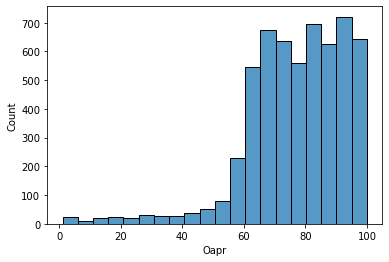

In [18]:
sns.histplot(x=data1['Oapr'],bins=20)

In [19]:
print("sns.boxplot(data1['Oapr'])")


sns.boxplot(data1['Oapr'])


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Oapr'>

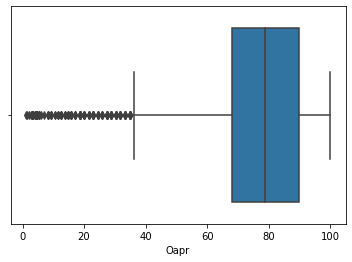

In [20]:
#checking outliers
sns.boxplot(data1['Oapr'])

In [21]:
remove=data1.loc[(data1['Oapr']<60)]
remove

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
53,BS ARCHITECTURE,College of Architecture,72.78,30.03,44.12,24.91,43.49,54.31
55,BS ARCHITECTURE,College of Architecture,28.82,54.75,66.81,18.16,72.90,44.06
120,BS ARCHITECTURE,College of Architecture,9.69,35.70,44.12,34.54,26.06,18.60
190,BS ARCHITECTURE,College of Architecture,68.50,30.03,59.25,14.31,63.10,54.31
215,BS ASIAN STUDIES,CAIS,49.95,35.70,29.96,70.61,79.78,52.87
...,...,...,...,...,...,...,...,...
5616,BS BIOLOGY,CSM,41.05,54.75,29.96,18.16,20.60,33.28
5745,BS STATISTIC,CSM,37.99,25.06,51.68,24.91,43.49,34.82
5773,BS COMMUNITY DEVELOPMENT,CSWCD,41.05,54.75,24.36,63.45,33.69,42.52
5782,BS COMMUNITY DEVELOPMENT,CSWCD,25.99,66.85,85.06,53.82,53.29,54.31


In [22]:
data1=data1.loc[(data1['Oapr']>=60)]
data1

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37
...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,90.77,92.88,96.28,93.38,87.72,95.42
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,72.78,77.12,18.75,75.28,72.90,70.30
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,88.66,77.12,59.25,79.96,63.10,84.19
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,84.91,54.75,85.06,53.82,53.29,78.81


<AxesSubplot:>

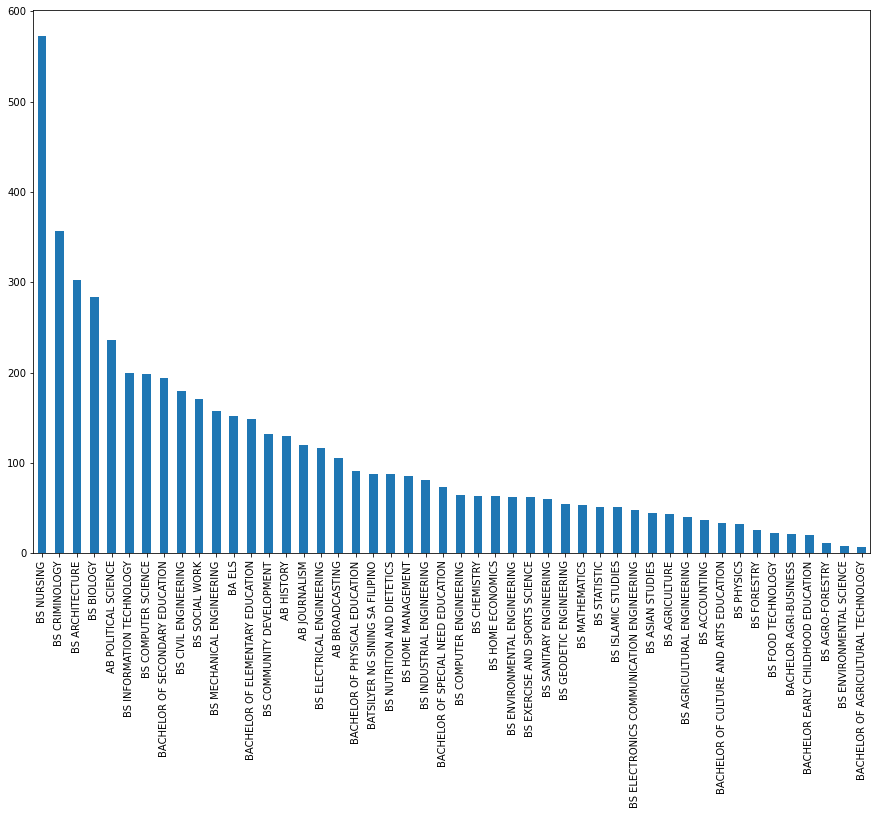

In [23]:
data1['Course'].value_counts().plot( kind='bar', figsize=(15,10))

<function matplotlib.pyplot.show(close=None, block=None)>

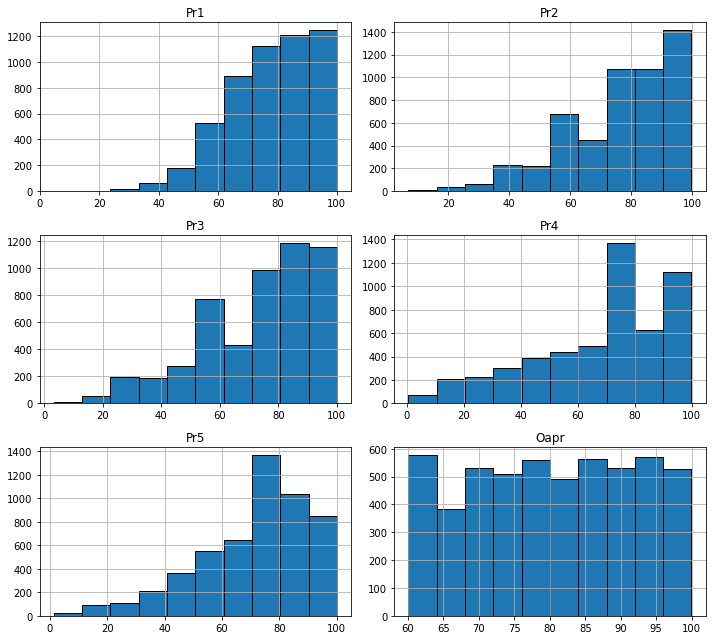

In [24]:
#plot histogram 
data1.hist(figsize=(10,9), ec="k")
plt.tight_layout()
plt.show

## Feature Engineering

Combine Some features in the dataset

In [25]:
#add all features
df_sum = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr' 
]
df_sum = data1[df_sum]
row_sums = df_sum.sum(axis=1)
data1['Sum'] = row_sums
data1

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\211347047.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Sum'] = row_sums


,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25,409.01
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09,306.28
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07,321.29
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37,339.18
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37,351.08
...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,90.77,92.88,96.28,93.38,87.72,95.42,556.45
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,72.78,77.12,18.75,75.28,72.90,70.30,387.13
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,88.66,77.12,59.25,79.96,63.10,84.19,452.28
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,84.91,54.75,85.06,53.82,53.29,78.81,410.64


In [26]:
#Adding the Pr1 which is the English Proficiency and the Pr2 which is the Reading Comprehension
Pr1_Pr2 = [
     'Pr1',
     'Pr2'
]
Pr1_Pr2 = data1[Pr1_Pr2]
row_sums = Pr1_Pr2.sum(axis=1)
data1['English/Reading'] = row_sums
data1

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\2131219747.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['English/Reading'] = row_sums


,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75
...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66


In [27]:
#Adding the Pr4 which is the Quantitative Skills and the Pr5 which is the Abstract Thinking Skills
Pr4_Pr5 = [
     'Pr4',
     'Pr5'
]
Pr4_Pr5 = data1[Pr4_Pr5]
row_sums = Pr4_Pr5.sum(axis=1)
data1['Math/Logic'] = row_sums
data1

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\3101897309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Math/Logic'] = row_sums


,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75,133.71
...,...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11


In [28]:
pr = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5'
]
pr = data1[pr]
row_sums = pr.sum(axis=1)
data1['PR'] = row_sums
data1

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\2196252988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PR'] = row_sums


,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75,133.71,289.71
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10,461.03
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18,316.83
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06,368.09
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11,331.83


In [29]:
#Create a numerical value for the Course and College
data1['Numerical_Course'], uniques = pd.factorize(data1['Course'])
data1['Numerical_College'], uniques = pd.factorize(data1['College'])

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\229870744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Numerical_Course'], uniques = pd.factorize(data1['Course'])
C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\229870744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Numerical_College'], uniques = pd.factorize(data1['College'])


In [30]:
print("data1['Numerical_Course'], uniques = pd.factorize(data1['Course'])")

data1['Numerical_Course'], uniques = pd.factorize(data1['Course'])


In [31]:
data1.head()

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76,0,0
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19,0,0
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22,0,0
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81,0,0
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75,133.71,289.71,0,0


# Correlation

In [32]:
data1.corr(method='pearson')

,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
Pr1,1.000000,0.391931,0.303497,0.197970,0.309099,0.813838,0.658995,0.799495,0.314919,0.623707,0.026028,0.001371
Pr2,0.391931,1.000000,0.262835,0.172782,0.225618,0.604514,0.606994,0.865962,0.249367,0.601797,0.000340,0.006249
Pr3,0.303497,0.262835,1.000000,0.251841,0.273481,0.609078,0.657496,0.336588,0.331511,0.660473,0.040667,-0.012415
Pr4,0.197970,0.172782,0.251841,1.000000,0.240378,0.514908,0.632987,0.220427,0.828334,0.649302,0.049264,-0.016082
Pr5,0.309099,0.225618,0.273481,0.240378,1.000000,0.543734,0.637064,0.315334,0.742921,0.648683,0.006636,-0.051748
Oapr,0.813838,0.604514,0.609078,0.514908,0.543734,1.000000,0.958137,0.837095,0.668899,0.941318,0.050557,-0.008961
Sum,0.658995,0.606994,0.657496,0.632987,0.637064,0.958137,1.000000,0.754542,0.804193,0.998547,0.042860,-0.022894
English/Reading,0.799495,0.865962,0.336588,0.220427,0.315334,0.837095,0.754542,1.000000,0.334004,0.731966,0.014371,0.004825
Math/Logic,0.314919,0.249367,0.331511,0.828334,0.742921,0.668899,0.804193,0.334004,1.000000,0.822150,0.037803,-0.040957
PR,0.623707,0.601797,0.660473,0.649302,0.648683,0.941318,0.998547,0.731966,0.822150,1.000000,0.041011,-0.025302


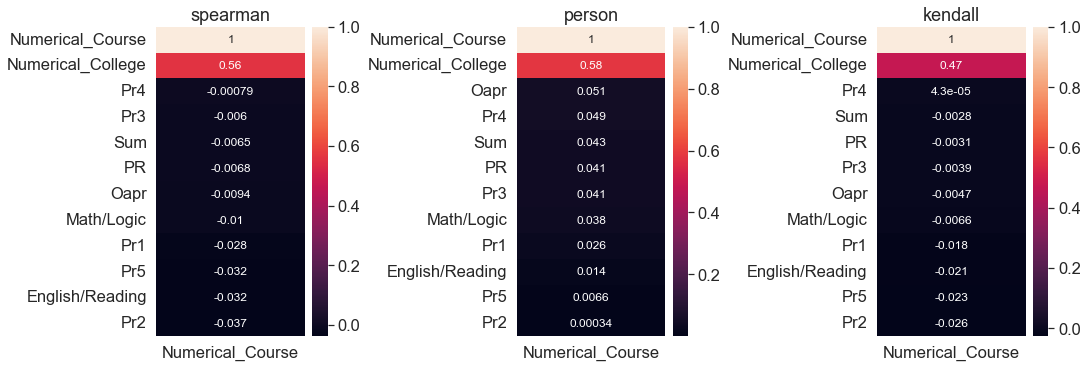

In [33]:
# set the font size
sns.set(font_scale=1.5)

# compute the correlation matrices
SpearmanCorr_ = data1.corr(method="spearman")[['Numerical_Course']].sort_values(by='Numerical_Course', ascending=False)
PearsonCorr_ = data1.corr(method="pearson")[['Numerical_Course']].sort_values(by='Numerical_Course', ascending=False)
KendallCorr_ = data1.corr(method="kendall")[['Numerical_Course']].sort_values(by='Numerical_Course', ascending=False)

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)

# plot the heatmaps with enlarged font size
sns.heatmap(SpearmanCorr_, annot=True, annot_kws={"size": 12}, ax=axes[0]).set_title("spearman")
sns.heatmap(PearsonCorr_, annot=True, annot_kws={"size": 12}, ax=axes[1]).set_title("person")
sns.heatmap(KendallCorr_, annot=True, annot_kws={"size": 12}, ax=axes[2]).set_title("kendall")

# display the heatmaps
plt.show()

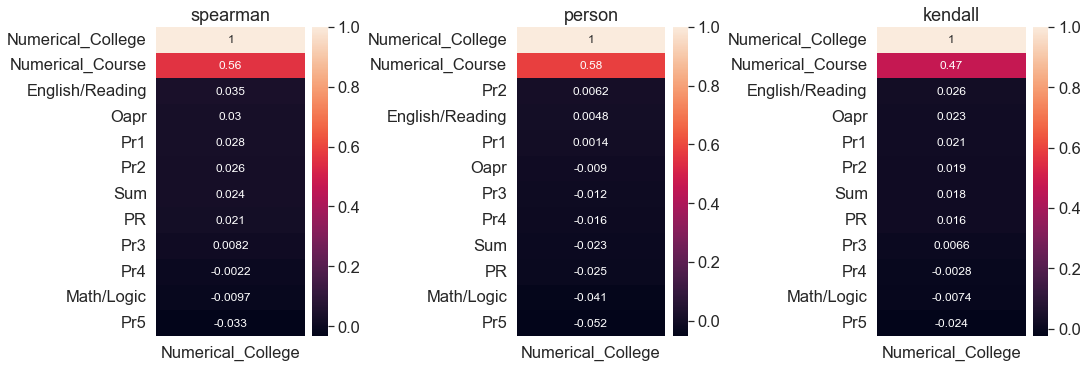

In [34]:
# set the font size
sns.set(font_scale=1.5)

# compute the correlation matrices
SpearmanCorr_ = data1.corr(method="spearman")[['Numerical_College']].sort_values(by='Numerical_College', ascending=False)
PearsonCorr_ = data1.corr(method="pearson")[['Numerical_College']].sort_values(by='Numerical_College', ascending=False)
KendallCorr_ = data1.corr(method="kendall")[['Numerical_College']].sort_values(by='Numerical_College', ascending=False)

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)

# plot the heatmaps with enlarged font size
sns.heatmap(SpearmanCorr_, annot=True, annot_kws={"size": 12}, ax=axes[0]).set_title("spearman")
sns.heatmap(PearsonCorr_, annot=True, annot_kws={"size": 12}, ax=axes[1]).set_title("person")
sns.heatmap(KendallCorr_, annot=True, annot_kws={"size": 12}, ax=axes[2]).set_title("kendall")

# display the heatmaps
plt.show()

In [35]:
data1.Course.value_counts()

BS NURSING                                  573
BS CRIMINOLOGY                              357
BS ARCHITECTURE                             302
BS BIOLOGY                                  284
AB POLITICAL SCIENCE                        236
BS INFORMATION TECHNOLOGY                   200
BS COMPUTER SCIENCE                         199
BACHELOR OF SECONDARY EDUCATION             194
BS CIVIL ENGINEERING                        180
BS SOCIAL WORK                              171
BS MECHANICAL ENGINEERING                   158
BA ELS                                      152
BACHELOR OF ELEMENTARY EDUCATION            149
BS COMMUNITY DEVELOPMENT                    132
AB HISTORY                                  130
AB JOURNALISM                               120
BS ELECTRICAL ENGINEERING                   116
AB BROADCASTING                             105
BACHELOR OF PHYSICAL EDUCATION               91
BATSILYER NG SINING SA FILIPINO              88
BS NUTRITION AND DIETETICS              

In [36]:
data1.drop(data1[(data1['Course'] == 'BACHELOR OF AGRICULTURAL TECHNOLOGY')].index, inplace = True)

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_13920\2082046780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(data1[(data1['Course'] == 'BACHELOR OF AGRICULTURAL TECHNOLOGY')].index, inplace = True)


In [37]:
from sklearn.model_selection import train_test_split

data1_train,data1_test = train_test_split(data1, test_size=0.2, random_state=0)

In [38]:
data1_train

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
4616,BS NURSING,CN,90.77,94.82,94.84,53.82,87.72,92.90,514.87,185.59,141.54,421.97,7,4
5258,BACHELOR OF PHYSICAL EDUCATION,CSSPE,34.94,82.26,89.19,79.96,72.90,70.30,429.55,117.20,152.86,359.25,30,5
5876,BS SOCIAL WORK,CSWCD,89.71,66.85,76.79,63.45,79.78,84.88,461.46,156.56,143.23,376.58,10,7
2020,BS INDUSTRIAL ENGINEERING,COE,66.01,87.40,66.81,84.63,72.90,77.90,455.65,153.41,157.53,377.75,37,3
54,BS ARCHITECTURE,College of Architecture,76.83,10.15,72.66,24.91,63.10,60.09,307.74,86.98,88.01,247.65,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,BS COMMUNITY DEVELOPMENT,CSWCD,70.75,54.75,29.96,70.61,53.29,63.60,342.96,125.50,123.90,279.36,18,7
3926,BS NUTRITION AND DIETETICS,CHE,83.47,98.70,72.66,34.54,63.10,83.50,435.97,182.17,97.64,352.47,26,10
1967,BS ENVIRONMENTAL ENGINEERING,COE,55.84,71.99,76.79,44.18,53.29,64.72,366.81,127.83,97.47,302.09,36,3
3017,BS ARCHITECTURE,College of Architecture,76.83,82.26,72.66,84.63,87.72,84.19,488.29,159.09,172.35,404.10,4,1


In [39]:
data1_test

,Course,College,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
4923,BS ELECTRICAL ENGINEERING,COE,70.75,61.11,59.25,70.61,83.75,73.34,418.81,131.86,154.36,345.47,35,3
5178,BACHELOR OF PHYSICAL EDUCATION,CSSPE,70.75,42.05,85.06,53.82,53.29,69.19,374.16,112.80,107.11,304.97,30,5
4848,BS ELECTRONICS COMMUNICATION ENGINEERING,COE,96.95,92.88,97.72,96.87,87.72,97.92,570.06,189.83,184.59,472.14,34,3
5920,BS SOCIAL WORK,CSWCD,68.50,82.26,72.66,44.18,20.60,66.95,355.15,150.76,64.78,288.20,10,7
3388,BS CRIMINOLOGY,CCJE,66.01,61.11,59.25,79.96,53.29,69.19,388.81,127.12,133.25,319.62,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,BS CHEMISTRY,CSM,94.81,90.94,94.84,97.62,91.68,97.09,566.98,185.75,189.30,469.89,41,12
251,BS ISLAMIC STUDIES,CAIS,84.91,92.88,51.68,75.28,26.06,80.63,411.44,177.79,101.34,330.81,9,6
5201,BACHELOR OF PHYSICAL EDUCATION,CSSPE,76.83,61.11,29.96,75.28,72.90,71.42,387.50,137.94,148.18,316.08,30,5
3090,BS ARCHITECTURE,College of Architecture,72.78,48.40,72.66,92.22,63.10,76.07,425.23,121.18,155.32,349.16,4,1


In [40]:
features = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr'
]

In [41]:
target ='Course'

In [42]:
x_train = data1_train[features]
y_train = data1_train[target]
x_test = data1_test[features]
y_test = data1_test[target]

# Model

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score,recall_score, f1_score

### Random Forest

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rfc = RandomForestClassifier()

# Train the model
model_rfc.fit(x_train, y_train)

# Predict using the trained model
pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.09637404580152671


In [48]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_rfc.predict_proba(x_test)

# Calculate the log loss
log_loss_rfc = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  11.479181463618982


In [49]:
#KFOLD 

pred_rfc = model_rfc.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_rfc), '-'],[np.mean(accuracy_rfc), np.mean(auc_rfc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.096374,-
K-fold,0.097375,0.594337


In [50]:
#calculating precision, recall, and f1 score
precision_rfc = precision_score(y_test, pred_rfc,average='weighted')
recall_rfc = recall_score(y_test, pred_rfc,average='weighted')
f1_rfc = f1_score(y_test, pred_rfc,average='weighted')
print('Precision: ',precision_rfc)
print('Recall: ',recall_rfc)
print('F1: ',f1_rfc)

Precision:  0.08022003079013493
Recall:  0.09637404580152671
F1:  0.0780635041836757


### KNN

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(x_train, y_train)

# Predict using the trained model
pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.0648854961832061


In [52]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_knn.predict_proba(x_test)

# Calculate the log loss
log_loss_knn = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_knn)

Log loss:  27.82189503012707


In [53]:
#KFOLD 
pred_knn = model_knn.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_knn = cross_val_score(model_knn, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_knn = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_knn), '-'],[np.mean(accuracy_knn), np.mean(auc_knn)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.064885,-
K-fold,0.071360,0.522623


In [54]:
#calculating precision, recall, and f1 score
precision_knn = precision_score(y_test, pred_knn,average='weighted')
recall_knn = recall_score(y_test, pred_knn,average='weighted')
f1_knn = f1_score(y_test, pred_knn,average='weighted')
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print('F1: ',f1_knn)

Precision:  0.059339182076649725
Recall:  0.0648854961832061
F1:  0.05799566052987292


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [55]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

# Train the model
model_naive.fit(x_train, y_train)

# Predict using the trained model
pred_naive = model_naive.predict(x_test)
accuracy = accuracy_score(y_test, pred_naive)
print("Accuracy:", accuracy)

Accuracy: 0.08778625954198473


In [56]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_naive.predict_proba(x_test)

# Calculate the log loss
log_loss_naive = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_naive)

Log loss:  3.870170717598478


In [57]:
#KFOLD 
pred_naive = model_naive.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_naive = cross_val_score(model_naive, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_naive = cross_val_score(model_naive, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_naive), '-'],[np.mean(accuracy_naive), np.mean(auc_naive)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.087786,-
K-fold,0.115752,0.676042


In [58]:
#calculating precision, recall, and f1 score
precision_naive = precision_score(y_test, pred_naive,average='weighted')
recall_naive = recall_score(y_test, pred_naive,average='weighted')
f1_naive = f1_score(y_test, pred_naive,average='weighted')
print('Precision: ',precision_naive)
print('Recall: ',recall_naive)
print('F1: ',f1_naive)

Precision:  0.09922907456360472
Recall:  0.08778625954198473
F1:  0.04936256042420466


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [59]:
# SVM
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(probability=True)

# Train the model
model_svm.fit(x_train, y_train)

# Predict using the trained model
pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.11927480916030535


In [60]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_svm.predict_proba(x_test)

# Calculate the log loss
log_loss_svm = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_svm)

Log loss:  3.36069782949881


In [61]:
#KFOLD 
pred_svm = model_svm.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_svm = cross_val_score(model_svm, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_svm = cross_val_score(model_svm, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_svm), '-'],[np.mean(accuracy_svm), np.mean(auc_svm)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.119275,-
K-fold,0.140811,0.66825


In [62]:
#calculating precision, recall, and f1 score
precision_svm = precision_score(y_test, pred_svm,average='weighted')
recall_svm = recall_score(y_test, pred_svm,average='weighted')
f1_svm = f1_score(y_test, pred_svm,average='weighted')
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
print('F1: ',f1_svm)

Precision:  0.039055188282006874
Recall:  0.11927480916030535
F1:  0.04306696616492175


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [63]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
# Train the model
model_tree.fit(x_train , y_train)

# Predict using the trained model
pred_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred_tree)
print("Accuracy:", accuracy)

Accuracy: 0.07538167938931298


In [64]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_tree.predict_proba(x_test)

# Calculate the log loss
log_loss_tree = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_tree)

Log loss:  33.29355226624669


In [65]:
#KFOLD 
pred_tree = model_tree.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_tree = cross_val_score(model_tree, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_tree = cross_val_score(model_tree, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_tree), '-'],[np.mean(accuracy_tree), np.mean(auc_tree)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.075382,-
K-fold,0.065155,0.506241


In [66]:
#calculating precision, recall, and f1 score
precision_tree = precision_score(y_test, pred_tree,average='weighted')
recall_tree = recall_score(y_test, pred_tree,average='weighted')
f1_tree = f1_score(y_test, pred_tree,average='weighted')
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)
print('F1: ',f1_tree)

Precision:  0.07453126381293304
Recall:  0.07538167938931298
F1:  0.07285669822475056


In [67]:
print('FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]')
print('Train:')
print('\tRandom Forest:',accuracy_score(y_train, model_rfc.predict(x_train)))
print('\tNaive Bayes:',accuracy_score(y_train, model_naive.predict(x_train)))
print('\tSVM:',accuracy_score(y_train, model_svm.predict(x_train)))
print('\tDecision Tree:',accuracy_score(y_train, model_tree.predict(x_train)))
print('\tKNN:',accuracy_score(y_train, model_knn.predict(x_train)))
print('\n\n')
print('Test:')
print('\tRandom Forest:',accuracy_score(y_test,pred_rfc))
print('\tNaive Bayes:',accuracy_score(y_test,pred_naive))
print('\tSVM:',accuracy_score(y_test,pred_svm))
print('\tDecision Tree:',accuracy_score(y_test,pred_tree))
print('\tKNN:',accuracy_score(y_test,pred_knn))

FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]
Train:
	Random Forest: 0.9887828162291169
	Naive Bayes: 0.1343675417661098
	SVM: 0.16181384248210023
	Decision Tree: 0.9887828162291169
	KNN: 0.3064439140811456



Test:
	Random Forest: 0.09637404580152671
	Naive Bayes: 0.08778625954198473
	SVM: 0.11927480916030535
	Decision Tree: 0.07538167938931298
	KNN: 0.0648854961832061


In [68]:
df = {
    'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_naive), accuracy_score(y_test,pred_svm), accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_tree)],
    'AUC': [np.mean(auc_rfc), np.mean(auc_naive), np.mean(auc_svm), np.mean(auc_knn),np.mean(auc_tree)],
    'Log loss': [log_loss_rfc, log_loss_naive, log_loss_svm, log_loss_knn,log_loss_tree],
    'Precision': [precision_rfc, precision_naive, precision_svm, precision_knn,precision_tree],
    'Recall': [recall_rfc, recall_naive, recall_svm, recall_knn,recall_tree],
    'F1 Score': [f1_rfc, f1_naive, f1_svm, f1_knn,f1_tree],

}

df = pd.DataFrame(df)
df


,Model,Accuracy,AUC,Log loss,Precision,Recall,F1 Score
0,Random Forest,0.096374,0.594337,11.479181,0.080220,0.096374,0.078064
1,Naive Bayes,0.087786,0.676042,3.870171,0.099229,0.087786,0.049363
2,SVM,0.119275,0.668250,3.360698,0.039055,0.119275,0.043067
3,KNN,0.064885,0.522623,27.821895,0.059339,0.064885,0.057996
4,Decision Tree,0.075382,0.506241,33.293552,0.074531,0.075382,0.072857


# Hyperparameter Tuning

In [43]:
features = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr',
    
]

In [44]:
target ='Course'

In [45]:
x_train = data1_train[features]
y_train = data1_train[target]
x_test = data1_test[features]
y_test = data1_test[target]

In [82]:
#Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
# Define the hyperparameters to search
param_dist1 = {'n_estimators': [150,70,90],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize the model
model_random = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(model_random, param_distributions=param_dist1, n_iter=20, cv=5)
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter:",random_search.best_params_)




Parameter: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}


In [83]:
#Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the hyperparameters to search
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}

# Initialize the model
model_naive = GaussianNB()

# Perform grid search
grid = GridSearchCV(model_naive, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'var_smoothing': 1e-10}


In [84]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters to search
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Initialize the model
model_svm = SVC(kernel='rbf')

# Perform grid search
grid = GridSearchCV(model_svm, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'C': 1, 'gamma': 0.001}


In [85]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the hyperparameters to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# Initialize the model
model_knn = KNeighborsClassifier()

# Perform grid search
grid = GridSearchCV(model_knn, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'n_neighbors': 9, 'weights': 'distance'}


In [86]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters to search
param_grid = {'max_depth': [1, 3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8, 10]}

# Initialize the model
model_tree = DecisionTreeClassifier()

# Perform grid search
grid = GridSearchCV(model_tree, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)




Parameter:  {'max_depth': 3, 'min_samples_split': 2}


## Model with the parameter

### Random Forest

In [46]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = 0,n_estimators = 150, min_samples_split= 2, min_samples_leaf= 4, max_depth= 5)

# Train the model
model_rfc.fit(x_train, y_train)

# Predict using the trained model
pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.12213740458015267


In [47]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_rfc.predict_proba(x_test)

# Calculate the log loss
log_loss_rfc = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  3.3304172821356723


In [53]:
#KFOLD 

pred_rfc = model_rfc.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_rfc), '-'],[np.mean(accuracy_rfc), np.mean(auc_rfc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.122137,-
K-fold,0.145823,0.681454


In [54]:
#calculating precision, recall, and f1 score
precision_rfc = precision_score(y_test, pred_rfc,average='weighted')
recall_rfc = recall_score(y_test, pred_rfc,average='weighted')
f1_rfc = f1_score(y_test, pred_rfc,average='weighted')
print('Precision: ',precision_rfc)
print('Recall: ',recall_rfc)
print('F1: ',f1_rfc)

Precision:  0.030674818321488453
Recall:  0.12213740458015267
F1:  0.043832172234365294


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
feature_importances = model_rfc.feature_importances_
print(feature_importances)

[0.22819411 0.09081775 0.10193476 0.16800187 0.06386115 0.34719037]


### KNN

In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 9, weights='distance')

# Train the model
model_knn.fit(x_train, y_train)

# Predict using the trained model
pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.10591603053435114


In [78]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_knn.predict_proba(x_test)

# Calculate the log loss
log_loss_knn = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_knn)

Log loss:  24.284810771673015


In [79]:
#KFOLD 
pred_knn = model_knn.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_knn = cross_val_score(model_knn, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_knn = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_knn), '-'],[np.mean(accuracy_knn), np.mean(auc_knn)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.105916,-
K-fold,0.089260,0.536989


In [80]:
#calculating precision, recall, and f1 score
precision_knn = precision_score(y_test, pred_knn,average='weighted')
recall_knn = recall_score(y_test, pred_knn,average='weighted')
f1_knn = f1_score(y_test, pred_knn,average='weighted')
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print('F1: ',f1_knn)

Precision:  0.09273084262438135
Recall:  0.10591603053435114
F1:  0.09145835101290331


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance

# Approach 1: Mutual Information
mi_scores = mutual_info_classif(x_train, y_train)
feature_importance_mi = dict(zip(range(x_train.shape[1]), mi_scores))

# Approach 2: Permutation Importance
results = permutation_importance(model_knn, x_test, y_test, scoring='accuracy', n_repeats=10, random_state=0)
importances = results.importances_mean
feature_importance_permutation = dict(zip(range(x_train.shape[1]), importances))

# Print feature importances based on mutual information
print("Feature Importance based on Mutual Information:")
for feature_idx, importance in feature_importance_mi.items():
    print("Feature:", feature_idx)
    print("Importance:", importance)

# Print feature importances based on permutation importance
print("Feature Importance based on Permutation Importance:")
for feature_idx, importance in feature_importance_permutation.items():
    print("Feature:", feature_idx)
    print("Importance:", importance)

Feature Importance based on Mutual Information:
Feature: 0
Importance: 0.1768984195584249
Feature: 1
Importance: 0.11124490823239164
Feature: 2
Importance: 0.12005957167091275
Feature: 3
Importance: 0.12818814275535484
Feature: 4
Importance: 0.09513024785666335
Feature: 5
Importance: 0.2630935269734156
Feature Importance based on Permutation Importance:
Feature: 0
Importance: 0.0357824427480916
Feature: 1
Importance: 0.023091603053435113
Feature: 2
Importance: 0.018034351145038163
Feature: 3
Importance: 0.023473282442748086
Feature: 4
Importance: 0.021087786259541982
Feature: 5
Importance: 0.025763358778625955


### Naive Bayes

In [86]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB(var_smoothing= 1e-10)

# Train the model
model_naive.fit(x_train, y_train)

# Predict using the trained model
pred_naive = model_naive.predict(x_test)
accuracy = accuracy_score(y_test, pred_naive)
print("Accuracy:", accuracy)

Accuracy: 0.08778625954198473


In [87]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_naive.predict_proba(x_test)

# Calculate the log loss
log_loss_naive = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_naive)

Log loss:  3.870170722166954


In [88]:
#KFOLD 
pred_naive = model_naive.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_naive = cross_val_score(model_naive, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_naive = cross_val_score(model_naive, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_naive), '-'],[np.mean(accuracy_naive), np.mean(auc_naive)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.087786,-
K-fold,0.115752,0.676042


In [89]:
#calculating precision, recall, and f1 score
precision_naive = precision_score(y_test, pred_naive,average='weighted')
recall_naive = recall_score(y_test, pred_naive,average='weighted')
f1_naive = f1_score(y_test, pred_naive,average='weighted')
print('Precision: ',precision_naive)
print('Recall: ',recall_naive)
print('F1: ',f1_naive)

Precision:  0.09922907456360472
Recall:  0.08778625954198473
F1:  0.04936256042420466


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model_naive, x_test, y_test, scoring='accuracy', n_repeats=10, random_state=0)

# Get feature importances
importances = results.importances_mean

# Print feature importances
for feature_idx, importance in enumerate(importances):
    print("Feature:", feature_idx)
    print("Importance:", importance)

Feature: 0
Importance: 0.0030534351145038107
Feature: 1
Importance: 0.001335877862595415
Feature: 2
Importance: -0.010687022900763366
Feature: 3
Importance: -0.0064885496183206175
Feature: 4
Importance: -0.0109732824427481
Feature: 5
Importance: -0.0026717557251908428


### SVM

In [126]:
# SVM
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(probability=True,C=1, gamma= 0.001)

# Train the model
model_svm.fit(x_train, y_train)

# Predict using the trained model
pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.11641221374045801


In [127]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_svm.predict_proba(x_test)

# Calculate the log loss
log_loss_svm = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_svm)

Log loss:  3.3753596138536177


In [128]:
#KFOLD 
pred_svm = model_svm.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_svm = cross_val_score(model_svm, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_svm = cross_val_score(model_svm, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_svm), '-'],[np.mean(accuracy_svm), np.mean(auc_svm)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.116412,-
K-fold,0.138425,0.665863


In [129]:
#calculating precision, recall, and f1 score
precision_svm = precision_score(y_test, pred_svm,average='weighted')
recall_svm = recall_score(y_test, pred_svm,average='weighted')
f1_svm = f1_score(y_test, pred_svm,average='weighted')
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
print('F1: ',f1_svm)

Precision:  0.04478241287021355
Recall:  0.11641221374045801
F1:  0.052045520046013836


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'feature_names' is not defined

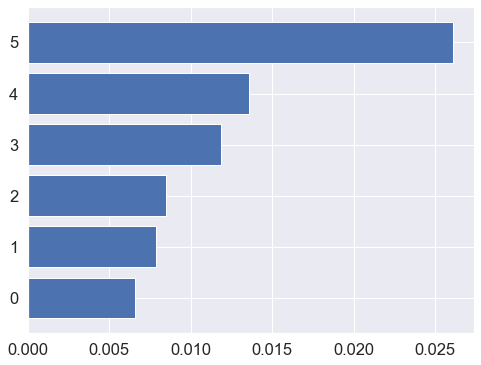

In [100]:
# Permutation Importance
perm_importance = permutation_importance(model_svm, x_train , y_train, n_repeats=10, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(x_train.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(x_train.shape[1]), feature_names[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance - Permutation Importance')
plt.show()

# Partial Dependence Plots
plt.figure(figsize=(10, 6))
plot_partial_dependence(model_svm, x_train, features=[0, 1, 2, 3], feature_names=feature_names, grid_resolution=50)
plt.subplots_adjust(top=0.9)
plt.suptitle('Partial Dependence Plots')
plt.show()

### Decision Tree

In [56]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth= 3, min_samples_split =2)
# Train the model
model_tree.fit(x_train , y_train)

# Predict using the trained model
pred_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred_tree)
print("Accuracy:", accuracy)

Accuracy: 0.11736641221374046


In [57]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_tree.predict_proba(x_test)

# Calculate the log loss
log_loss_tree = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_tree)

Log loss:  3.6963148402697814


In [58]:
#KFOLD 
pred_tree = model_tree.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_tree = cross_val_score(model_tree, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_tree = cross_val_score(model_tree, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_tree), '-'],[np.mean(accuracy_tree), np.mean(auc_tree)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.117366,-
K-fold,0.143437,0.646216


In [59]:
#calculating precision, recall, and f1 score
precision_tree = precision_score(y_test, pred_tree,average='weighted')
recall_tree = recall_score(y_test, pred_tree,average='weighted')
f1_tree = f1_score(y_test, pred_tree,average='weighted')
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)
print('F1: ',f1_tree)

Precision:  0.029196850819842312
Recall:  0.11736641221374046
F1:  0.04456196171435637


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
feature_importances = model_tree.feature_importances_
print(feature_importances)

[0.13522501 0.         0.         0.11843334 0.         0.74634165]


In [134]:
print('FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]')
print('Train:')
print('\tRandom Forest:',accuracy_score(y_train, model_rfc.predict(x_train)))
print('\tNaive Bayes:',accuracy_score(y_train, model_naive.predict(x_train)))
print('\tSVM:',accuracy_score(y_train, model_svm.predict(x_train)))
print('\tDecision Tree:',accuracy_score(y_train, model_tree.predict(x_train)))
print('\tKNN:',accuracy_score(y_train, model_knn.predict(x_train)))
print('\n\n')
print('Test:')
print('\tRandom Forest:',accuracy_score(y_test,pred_rfc))
print('\tNaive Bayes:',accuracy_score(y_test,pred_naive))
print('\tSVM:',accuracy_score(y_test,pred_svm))
print('\tDecision Tree:',accuracy_score(y_test,pred_tree))
print('\tKNN:',accuracy_score(y_test,pred_knn))

FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]
Train:
	Random Forest: 0.1766109785202864
	Naive Bayes: 0.1343675417661098
	SVM: 0.1954653937947494
	Decision Tree: 0.15536992840095465
	KNN: 0.9887828162291169



Test:
	Random Forest: 0.12213740458015267
	Naive Bayes: 0.08778625954198473
	SVM: 0.11641221374045801
	Decision Tree: 0.11736641221374046
	KNN: 0.10591603053435114


In [101]:
df = {
    'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_naive), accuracy_score(y_test,pred_svm), accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_tree)],
    'AUC': [np.mean(auc_rfc), np.mean(auc_naive), np.mean(auc_svm), np.mean(auc_knn),np.mean(auc_tree)],
    'Log loss': [log_loss_rfc, log_loss_naive, log_loss_svm, log_loss_knn,log_loss_tree],
    'Precision': [precision_rfc, precision_naive, precision_svm, precision_knn,precision_tree],
    'Recall': [recall_rfc, recall_naive, recall_svm, recall_knn,recall_tree],
    'F1 Score': [f1_rfc, f1_naive, f1_svm, f1_knn,f1_tree],

}

df = pd.DataFrame(df)
df


,Model,Accuracy,AUC,Log loss,Precision,Recall,F1 Score
0,Random Forest,0.122137,0.681454,3.330417,0.030675,0.122137,0.043832
1,Naive Bayes,0.087786,0.676042,3.870171,0.099229,0.087786,0.049363
2,SVM,0.119275,0.668250,3.360698,0.039055,0.119275,0.043067
3,KNN,0.105916,0.536989,24.284811,0.092731,0.105916,0.091458
4,Decision Tree,0.075382,0.506241,33.293552,0.074531,0.075382,0.072857


## ROC

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


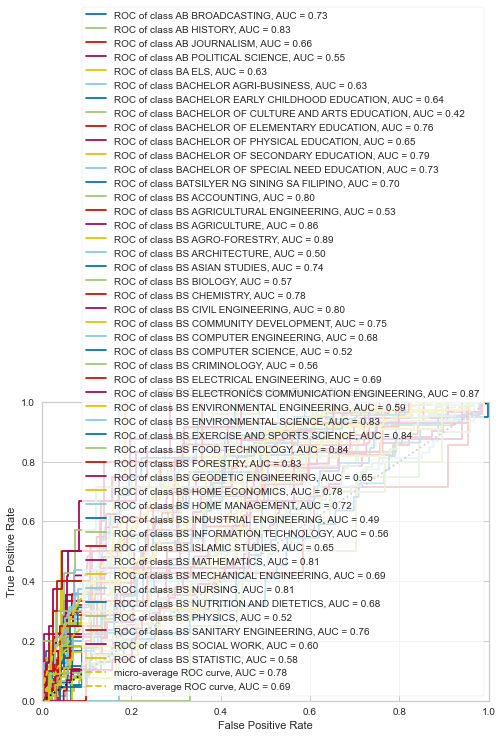

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [110]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_rfc)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [111]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y_train)
classes=label_encoder.classes_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


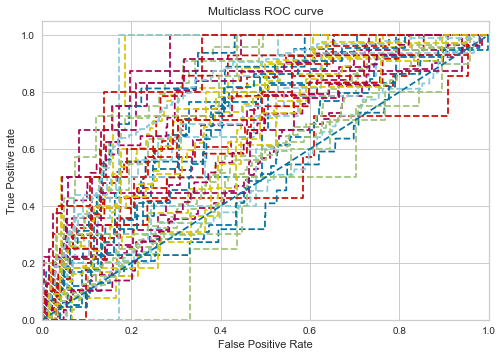

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


# RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# RF.fit(x_train,y_train)
# y_pred =RF.predict(x_test)
pred_prob = model_rfc.predict_proba(x_test)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--' 
             )
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


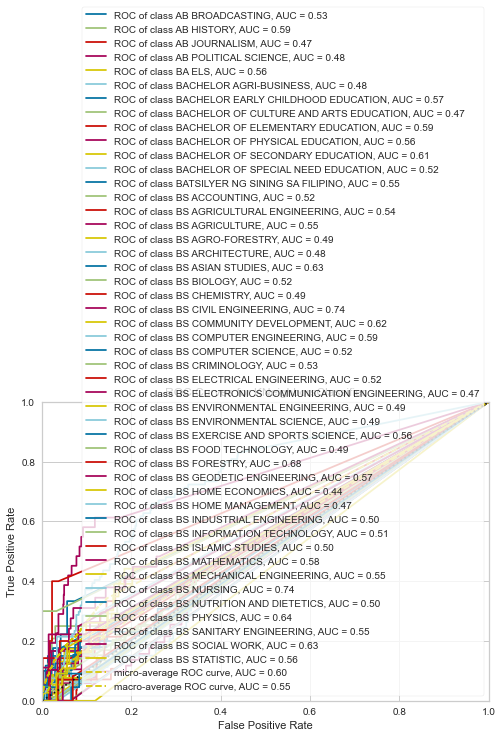

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [113]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_knn)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


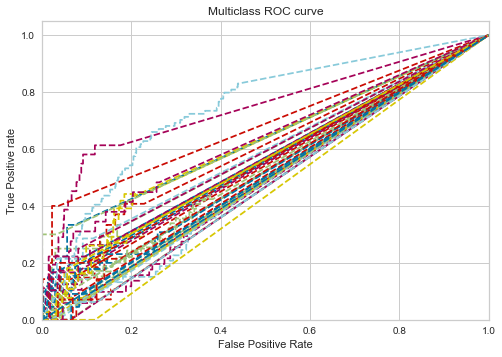

In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


# RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# RF.fit(x_train,y_train)
# y_pred =RF.predict(x_test)
pred_prob = model_knn.predict_proba(x_test)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--' 
             )
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


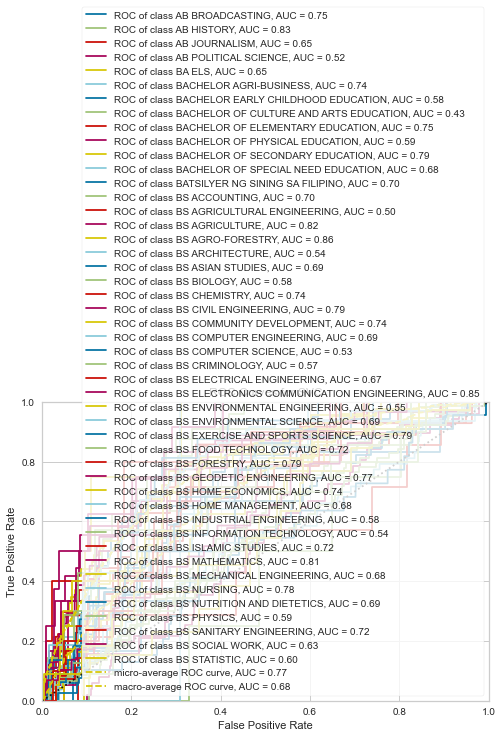

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [115]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_svm)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


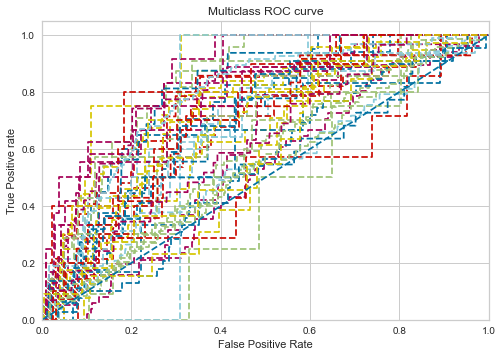

In [116]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


# RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# RF.fit(x_train,y_train)
# y_pred =RF.predict(x_test)
pred_prob = model_svm.predict_proba(x_test)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--' 
             )
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


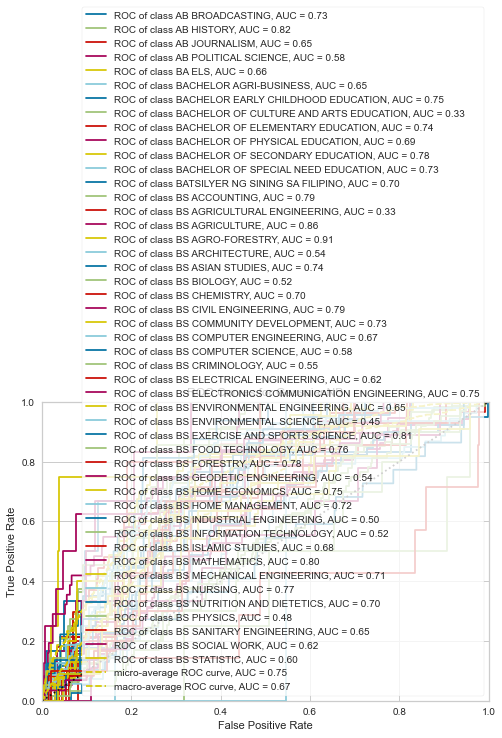

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [117]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_naive)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


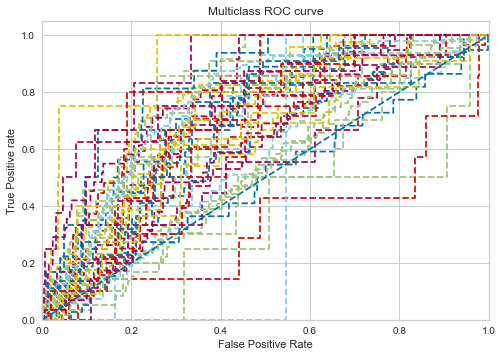

In [118]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


# RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# RF.fit(x_train,y_train)
# y_pred =RF.predict(x_test)
pred_prob = model_naive.predict_proba(x_test)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--' 
             )
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


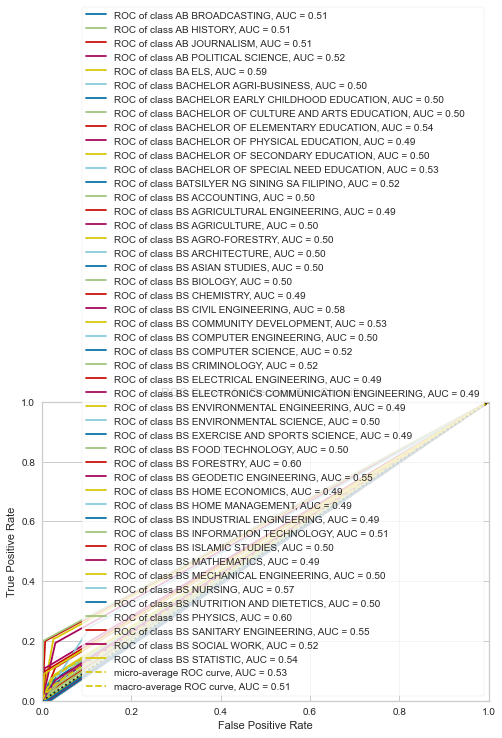

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [119]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_tree)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


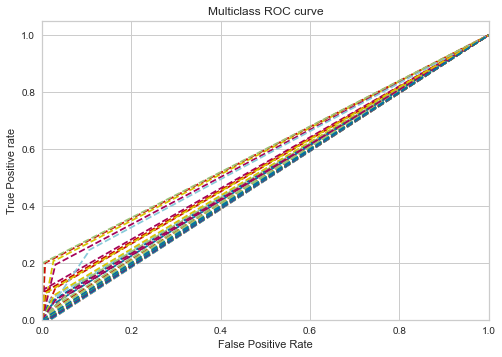

In [120]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


# RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# RF.fit(x_train,y_train)
# y_pred =RF.predict(x_test)
pred_prob = model_tree.predict_proba(x_test)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--' 
             )
#     plt.plot(fpr[i], tpr[i], linestyle='--', 
#              label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()